# Proyecto Población

Se van a responder algunas preguntas que se vayan ocurriendo a lo largo de la base de datos, se dejara nota de las funciones nuevas que se usen para la manipulacion de esta base

In [1]:
import matplotlib.pyplot as plt 
import seaborn as sn
import pandas as pd 

In [2]:
df = pd.read_csv('world_population.csv')
df.head(2)

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04


In [3]:
df.keys()

Index(['Rank', 'CCA3', 'Country/Territory', 'Capital', 'Continent',
       '2022 Population', '2020 Population', '2015 Population',
       '2010 Population', '2000 Population', '1990 Population',
       '1980 Population', '1970 Population', 'Area (km²)', 'Density (per km²)',
       'Growth Rate', 'World Population Percentage'],
      dtype='object')

Se desea obtener cuantos paises hay en toda la base de datos asi como cuales continentes se encuentran presentes

In [4]:
paises = df['Country/Territory'].count()
print('la cantidad de paises son',paises)

continentes = df['Continent'].unique()
print('los contienentes son continentes son',continentes)

la cantidad de paises son 234
los contienentes son continentes son ['Asia' 'Europe' 'Africa' 'Oceania' 'North America' 'South America']


### ¿Que continente tiene la mayor cantidad de poblacion al 2022?

Con group by podemos agrupar dos o mas variables de interes, en este caso la pregunta nos pide la poblacion por continente asi que se agrupan lo que es continente y la poblacion al 2022, sum nos permite sumar el todos los valoes de poblacion que pertenezcan a ese continente

Con sort_values organizamos el objeto de pandas de manera que lo muestre de menor a mayor y con ascendisg=False lo que hacemos es que lo muestre de mayor a menor

In [5]:
mayor_continente = df.groupby('Continent')['2022 Population'].sum()
mayor_continente = mayor_continente.sort_values(ascending=False)

para poder graficar separamos las columnas, para que al grafico vayan como x y y, esto se hace mediante la conversion a un diccionario y extrayendo sus llaves y valores para x y y, el metodo sort_values ya nos ordeno el objeto asi que al extraerlo estaran correctamente alineados

In [6]:
mayor = dict(mayor_continente)
print(mayor)
y=list(mayor.keys())
x=list(mayor.values())

{'Asia': 4721383274, 'Africa': 1426730932, 'Europe': 743147538, 'North America': 600296136, 'South America': 436816608, 'Oceania': 45038554}


Creamos un grafico con buenas practica con matplotlib, usando fig, para el lienzo y ax para los ejes, con subplots se manda a crear la figura

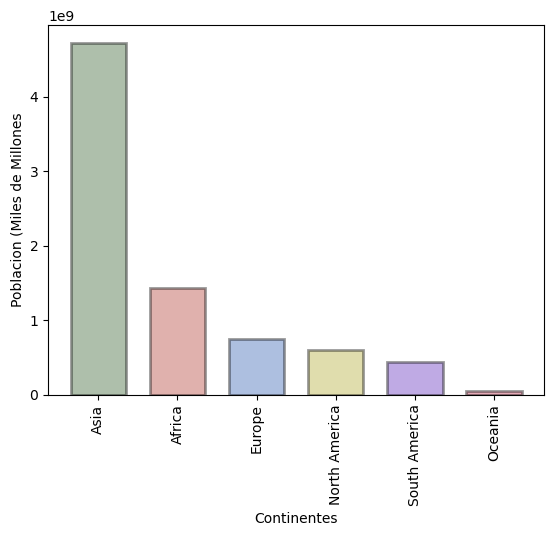

In [7]:
fig, ax = plt.subplots()

ax.bar(x=y,height=x, #Eje X Nombre de paises, eje Y poblacion de paises
       color=['#36612D','#B33E32','#3261B3','#B3AB32','#612CBD','#BD2C4B'], #Colores de las barras 
       alpha=0.4, #Transparencia 
       edgecolor='#000000', #Color del borde 
       linewidth=2, #Grosor del borde
       width=0.7) #grosor de las barras
plt.xticks(rotation=90)
plt.xlabel('Continentes')
plt.ylabel('Poblacion (Miles de Millones')
plt.show()

Respuesta : El continente con mayor poblacion corresponde a Asia con  4721383274 habitantes

### ¿Cual es el pais de cada continente con mayor poblacion?

In [8]:
df.keys()

Index(['Rank', 'CCA3', 'Country/Territory', 'Capital', 'Continent',
       '2022 Population', '2020 Population', '2015 Population',
       '2010 Population', '2000 Population', '1990 Population',
       '1980 Population', '1970 Population', 'Area (km²)', 'Density (per km²)',
       'Growth Rate', 'World Population Percentage'],
      dtype='object')

Vamos a obtener unicamente las variables que no son de interes, en este caso, continente, pais/territo y poblacion al 2022

In [9]:
df_paises = df.loc[:,['Continent','2022 Population','Country/Territory']]
df_paises


,Continent,2022 Population,Country/Territory
0,Asia,41128771,Afghanistan
1,Europe,2842321,Albania
2,Africa,44903225,Algeria
3,Oceania,44273,American Samoa
4,Europe,79824,Andorra
...,...,...,...
229,Oceania,11572,Wallis and Futuna
230,Africa,575986,Western Sahara
231,Asia,33696614,Yemen
232,Africa,20017675,Zambia


In [10]:
paises_mas_poblados = df_paises.groupby(['Continent']).apply(lambda x: x.loc[x['2022 Population'].idxmax()]).reset_index(drop=True)
paises_mas_poblados_ordenados = paises_mas_poblados.sort_values(by='2022 Population')
paises_mas_poblados_ordenados


,Continent,2022 Population,Country/Territory
4,Oceania,26177413,Australia
2,Europe,144713314,Russia
5,South America,215313498,Brazil
0,Africa,218541212,Nigeria
3,North America,338289857,United States
1,Asia,1425887337,China


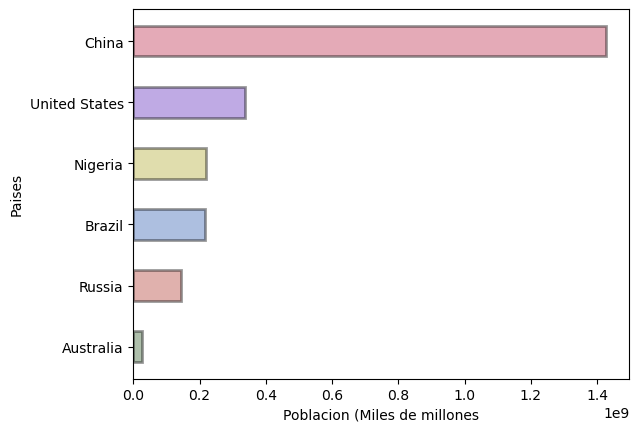

In [11]:
fig, ax = plt.subplots()

ax.barh(y=paises_mas_poblados_ordenados['Country/Territory'],
        width=paises_mas_poblados_ordenados['2022 Population'],
        color=['#36612D','#B33E32','#3261B3','#B3AB32','#612CBD','#BD2C4B'],
        alpha=0.4, #Transparencia 
        edgecolor='#000000', #Color del borde 
        linewidth=2, #Grosor del borde
        height=0.5 #anchura de las barras
)
plt.xlabel('Poblacion (Miles de millones')
plt.ylabel('Paises')
plt.show()

En la tabla anterior se muestra la respuesta a la pregunta

### ¿Cual es el pais con menos poblacion por continente?

In [12]:
df_paises

,Continent,2022 Population,Country/Territory
0,Asia,41128771,Afghanistan
1,Europe,2842321,Albania
2,Africa,44903225,Algeria
3,Oceania,44273,American Samoa
4,Europe,79824,Andorra
...,...,...,...
229,Oceania,11572,Wallis and Futuna
230,Africa,575986,Western Sahara
231,Asia,33696614,Yemen
232,Africa,20017675,Zambia


In [13]:
paises_menos_poblados = df_paises.groupby(['Continent']).apply(lambda x: x.loc[x['2022 Population'].idxmin()]).reset_index(drop=True)
paises_menos_poblados_ordenados = paises_menos_poblados.sort_values(by='2022 Population',ascending=False)
paises_menos_poblados_ordenados

,Continent,2022 Population,Country/Territory
1,Asia,449002,Brunei
0,Africa,107118,Seychelles
3,North America,4390,Montserrat
5,South America,3780,Falkland Islands
4,Oceania,1871,Tokelau
2,Europe,510,Vatican City


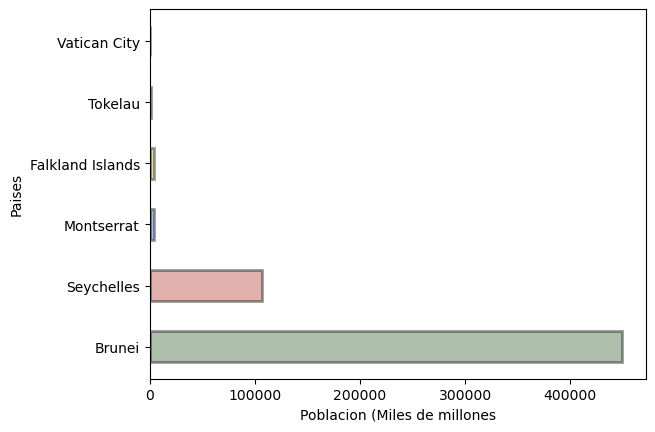

In [14]:
fig, ax = plt.subplots()

ax.barh(y=paises_menos_poblados_ordenados['Country/Territory'],
        width=paises_menos_poblados_ordenados['2022 Population'],
        color=['#36612D','#B33E32','#3261B3','#B3AB32','#612CBD','#BD2C4B'],
        alpha=0.4, #Transparencia 
        edgecolor='#000000', #Color del borde 
        linewidth=2, #Grosor del borde
        height=0.5 #anchura de las barras
)
plt.xlabel('Poblacion (Miles de millones')
plt.ylabel('Paises')
plt.show()

### ¿Cual es la diferencia relativa y absoluta en la poblacion del mundo entre el 2020 y 2022?

In [15]:
df_poblacion = df.loc[:,['2022 Population','2020 Population']]
poblacion_2020=df_poblacion['2020 Population'].sum()
poblacion_2022=df_poblacion['2022 Population'].sum()
print(poblacion_2020,'Personas')
print(poblacion_2022,'Personas')

diferencia_absoluta = poblacion_2022 - poblacion_2020 
diferencia_relativa = round((diferencia_absoluta/poblacion_2022)*100,3) 
print(f'la diferencia absoluta es {diferencia_absoluta} personas')
print(f'La diferencia relativa es {diferencia_relativa}%')

7839250603 Personas
7973413042 Personas
la diferencia absoluta es 134162439 personas
La diferencia relativa es 1.683%


### ¿Cual es el comportamiento de la población en un país de sur america a lo largo del tiempo? 

In [16]:
df_suramerica = df.loc[:,['2022 Population', '2020 Population', '2015 Population',
       '2010 Population', '2000 Population', '1990 Population',
       '1980 Population', '1970 Population','Country/Territory','Continent']]
sur_america = df_suramerica.loc[:,'Continent'] == 'South America' 
df_sur_america = df_suramerica.loc[sur_america]
df_sur_america

,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Country/Territory,Continent
8,45510318,45036032,43257065,41100123,37070774,32637657,28024803,23842803,Argentina,South America
24,12224110,11936162,11090085,10223270,8592656,7096194,5736088,4585693,Bolivia,South America
27,215313498,213196304,205188205,196353492,175873720,150706446,122288383,96369875,Brazil,South America
40,19603733,19300315,17870124,17004162,15351799,13342868,11469828,9820481,Chile,South America
42,51874024,50930662,47119728,44816108,39215135,32601393,26176195,20905254,Colombia,South America
56,18001000,17588595,16195902,14989585,12626507,10449837,8135845,6172215,Ecuador,South America
64,3780,3747,3408,3187,3080,2332,2240,2274,Falkland Islands,South America
69,304557,290969,257026,228453,164351,113931,66825,46484,French Guiana,South America
86,808726,797202,755031,747932,759051,747116,778176,705261,Guyana,South America
161,6780744,6618695,6177950,5768613,5123819,4059195,3078912,2408787,Paraguay,South America


In [17]:
colombia = df_sur_america.loc[:,'Country/Territory'] == 'Colombia'
df_colombia=df_sur_america.loc[colombia]
df_colombia.drop(['Continent'],axis=1)
df_colombia

,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Country/Territory,Continent
42,51874024,50930662,47119728,44816108,39215135,32601393,26176195,20905254,Colombia,South America


In [18]:
df_colombia = df_colombia.drop(['Continent'],axis=1).reset_index(drop=True)
df_colombia

,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Country/Territory
0,51874024,50930662,47119728,44816108,39215135,32601393,26176195,20905254,Colombia


In [19]:
poblacion_colombiana = df_colombia.loc[0].tolist()
poblacion_colombiana.remove('Colombia')
poblacion_colombiana.reverse()
poblacion_colombiana

[20905254,
 26176195,
 32601393,
 39215135,
 44816108,
 47119728,
 50930662,
 51874024]

Se define una funcion para obtener los indices de crecimiento año a año de cualquier pais

In [20]:
def indice_crecimiento(historico):
    indices = []
    for i in range(len(historico)-1):
        indice_tiempo= round(((historico[i+1]-historico[i])/historico[i])*100,3)
        indices.append(indice_tiempo)
        indice_crecimiento = round(sum(indices)/len(indices),3)

    return indices,indice_crecimiento

In [21]:
tasas,indice =indice_crecimiento(poblacion_colombiana)

años= [1970,1980,1990,2000,2010,2015,2020,2022]

tupla_años=[]

for i in range(len(años)-1):
    tupla = (años[i],años[i+1])
    tupla_años.append(tupla)

indices = list(zip(tupla_años,tasas))

for i,j in indices:
    print(f'La tasa de crecimiento entre {i} es {j}%')

print(f'El indice crecimiento promedio entre los años seleccionados es {indice}%')

La tasa de crecimiento entre (1970, 1980) es 25.213%
La tasa de crecimiento entre (1980, 1990) es 24.546%
La tasa de crecimiento entre (1990, 2000) es 20.287%
La tasa de crecimiento entre (2000, 2010) es 14.283%
La tasa de crecimiento entre (2010, 2015) es 5.14%
La tasa de crecimiento entre (2015, 2020) es 8.088%
La tasa de crecimiento entre (2020, 2022) es 1.852%
El indice crecimiento promedio entre los años seleccionados es 14.201%


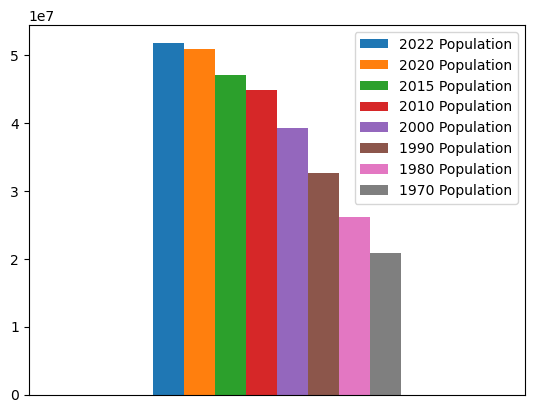

In [22]:
df_colombia.plot(kind='bar')
plt.xticks([])

plt.show()

### Conclusión

Se evidenciaron algunos aspectos de la poblacion mundial, como lo es, la gran diferencia en escala poblacional que tiene el continente asiatico, ya que las graficas y las cifras demuestran que esta muy por encima de los demas contienentes; siendo el continenteque contiene el pais con mayor poblacion. Adicionalmente se puede ver que el pais con menor poblacion es la ciudad del vaticano, ubicada en europa, se realizaran estudios posteriores para ver si existe una correlacion entre el area y el tamaño de la poblacion. 

Se analizo la diferencia absoluta y relativa entre años de pandemia, entre 2020 y 2022, los cuales indicaron una diferencia de 1,6% apesar de ser una tasa baja esta tiene una traduccion en personas de 134.162.439 lo que es una cifra aun bastante alta.

El comportamiento del pais suramericano en este caso colombia, presento un aumento en la poblacion pero una disminucion en sus tasas de crecimiento, iniciando con un 25% y terminando en el ultimo año con 1.8%, lo que indica el cambio significativo en la mentalidad de las edades fertiles del pais. 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=01c94fd3-8452-4666-9843-af269f80bd27' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>